In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table 
from ISLP.models import ModelSpec as MS

In [3]:
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree , export_text)
from sklearn.metrics import (accuracy_score ,log_loss)

In [4]:
houseData = pd.read_csv("./Econ424_F2023_PC2_training_set_v1.csv")
print(houseData)
model = MS(houseData.columns.drop('LOGVALUE'), intercept=False) 
D = model.fit_transform(houseData)
feature_names = list(D.columns)
print(D)
X = np.asarray(D)

        LOGVALUE  BATHS  BEDRMS  BUILT       UNITSF      LOT  ROOMS  REGION  \
0      12.899220      2       3   2001  1531.000000   2712.0      6       4   
1      11.225243      1       3   1975  1125.000000  11000.0      5       3   
2      11.561716      2       3   1995  1300.000000  44000.0      5       3   
3      13.122363      4       5   2001  8299.000000  11000.0     11       4   
4      11.891362      2       4   1990  1200.000000  11000.0      7       2   
...          ...    ...     ...    ...          ...      ...    ...     ...   
19994  12.959844      2       3   1940  1100.000000   5000.0      6       4   
19995  11.775290      2       2   1980  2314.179989   5500.0      4       3   
19996  12.899220      3       2   1990  4200.000000  11000.0      7       2   
19997  12.468437      3       5   1975  3000.000000  22000.0     11       2   
19998  11.608236      2       3   1950  9110.000000  10500.0      5       3   

       KITCHEN  FLOORS  LAUNDY  RECRM  METRO  METRO

In [5]:
(X_train,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
houseData['LOGVALUE'], test_size=0.2, random_state=20)

1.341732490282735

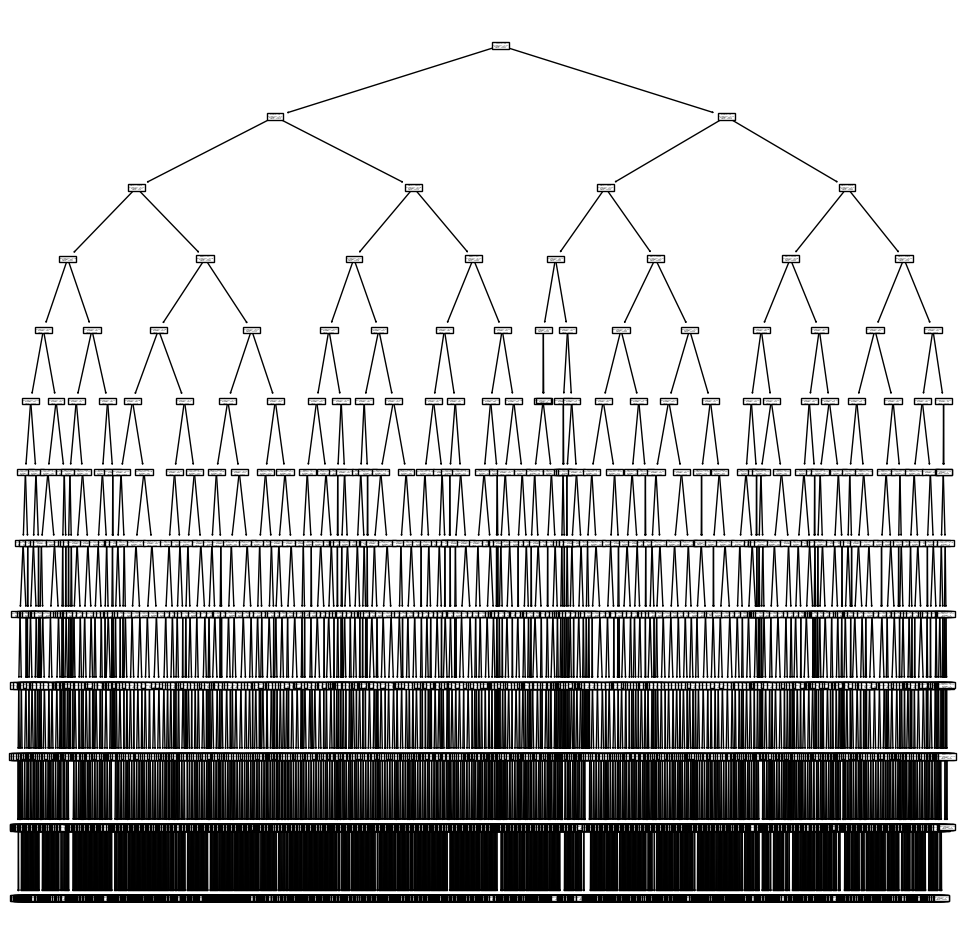

In [40]:
reg = DTR(max_depth=8) 
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1] 
plot_tree(reg,feature_names=feature_names, ax=ax)
np.mean((y_test - reg.predict(X_test))**2)

In [41]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train) 
kfold = skm.KFold(6, shuffle=True, random_state=20) 
grid = skm.GridSearchCV(reg, {'ccp_alpha': ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)


In [50]:
grid.cv_results_

{'mean_fit_time': array([0.02664797, 0.0263478 , 0.02597833, ..., 0.02962033, 0.02965681,
        0.02964362]),
 'std_fit_time': array([0.0002876 , 0.00025174, 0.00034257, ..., 0.0006499 , 0.00054128,
        0.00037078]),
 'mean_score_time': array([0.00069006, 0.000537  , 0.00051363, ..., 0.00032663, 0.0003142 ,
        0.00033315]),
 'std_score_time': array([6.73191886e-05, 7.62498086e-05, 4.84257161e-05, ...,
        6.80837083e-05, 7.66030666e-05, 7.39736520e-05]),
 'param_ccp_alpha': masked_array(data=[0.0, 7.105871474568162e-18, 7.105871474568162e-18, ...,
                    0.034916012999193335, 0.07571564457473401,
                    0.11871606679822744],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ccp_alpha': 0.0},
  {'ccp_alpha': 7.105871474568162e-18},
  {'ccp_alpha': 7.105871474568162e-18},
  {'ccp_alpha': 1.1430030714716206e-09},
  {'ccp_alpha': 1.6493294545604911e-09},
  {'ccp_alph

In [42]:
best_ = grid.best_estimator_
print(np.mean((y_test - reg.predict(X_test))**2))
print(np.mean((y_test - best_.predict(X_test))**2))

1.341732490282735
1.0065560156908


[Text(0.535, 0.9285714285714286, 'region <= 3.5\nsquared_error = 1.174\nsamples = 15999\nvalue = 12.054'),
 Text(0.26, 0.7857142857142857, 'rooms <= 6.5\nsquared_error = 0.91\nsamples = 10740\nvalue = 11.812'),
 Text(0.16, 0.6428571428571429, 'unitsf <= 1066.5\nsquared_error = 0.964\nsamples = 5761\nvalue = 11.5'),
 Text(0.08, 0.5, 'floors <= 1.5\nsquared_error = 1.435\nsamples = 830\nvalue = 11.001'),
 Text(0.04, 0.35714285714285715, 'squared_error = 2.042\nsamples = 445\nvalue = 10.684'),
 Text(0.12, 0.35714285714285715, 'squared_error = 0.482\nsamples = 385\nvalue = 11.368'),
 Text(0.24, 0.5, 'baths <= 1.5\nsquared_error = 0.835\nsamples = 4931\nvalue = 11.584'),
 Text(0.2, 0.35714285714285715, 'squared_error = 0.768\nsamples = 2214\nvalue = 11.421'),
 Text(0.28, 0.35714285714285715, 'squared_error = 0.851\nsamples = 2717\nvalue = 11.717'),
 Text(0.36, 0.6428571428571429, 'unitsf <= 2821.0\nsquared_error = 0.605\nsamples = 4979\nvalue = 12.174'),
 Text(0.32, 0.5, 'squared_error = 0.

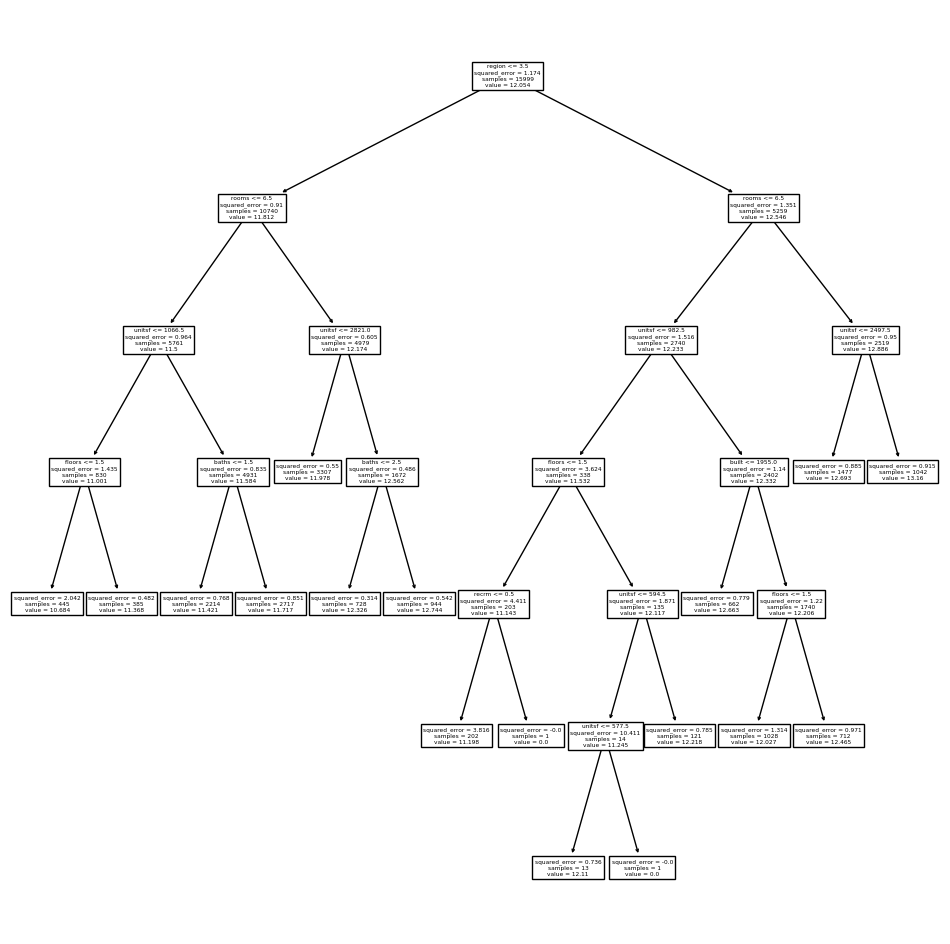

In [43]:
ax = subplots(figsize=(12,12))[1] 
plot_tree(G.best_estimator_ ,feature_names=feature_names, ax=ax)

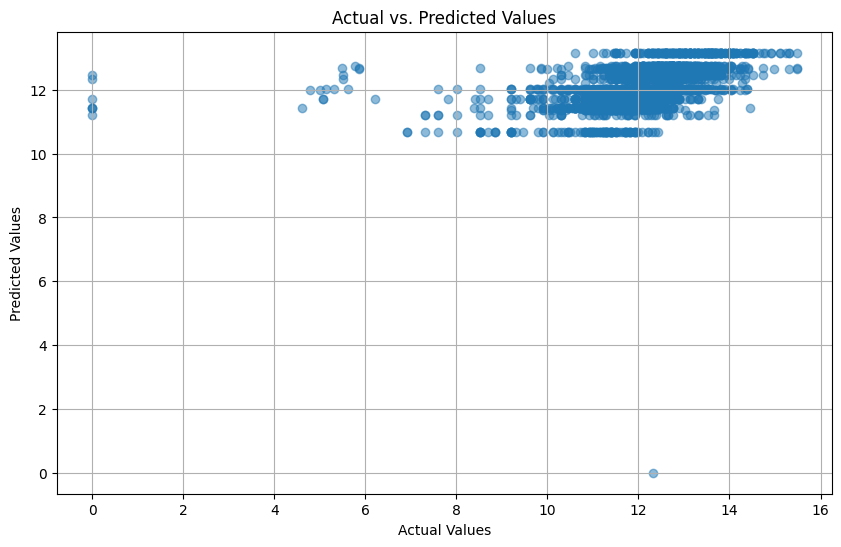

In [44]:
import matplotlib.pyplot as plt

# Predict the values using the best estimator from GridSearchCV
y_pred = best_.predict(X_test)

# Create a scatterplot to compare actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

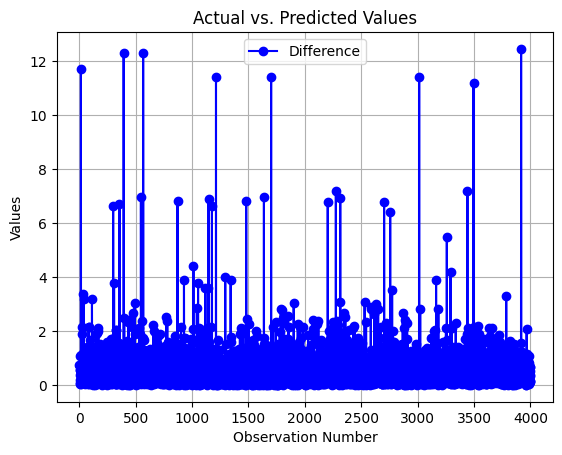

In [45]:

# Create an array of observation numbers
observation_numbers = np.arange(1, len(y_test) + 1)

# Plot the actual values as a blue line
plt.plot(observation_numbers, abs(y_test-y_pred), label='Difference', color='blue', marker='o', linestyle='-')

# Plot the predicted values as a red line
# plt.plot(observation_numbers, y_pred, label='Predicted', color='red', marker='x', linestyle='-')

# Add labels and title
plt.xlabel('Observation Number')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()






         importance
baths      0.032987
bedrms     0.000000
built      0.018466
unitsf     0.201401
lot        0.000000
rooms      0.326658
region     0.350528
kitchen    0.000000
floors     0.046932
laundy     0.000000
recrm      0.023028
metro      0.000000
metro3     0.000000


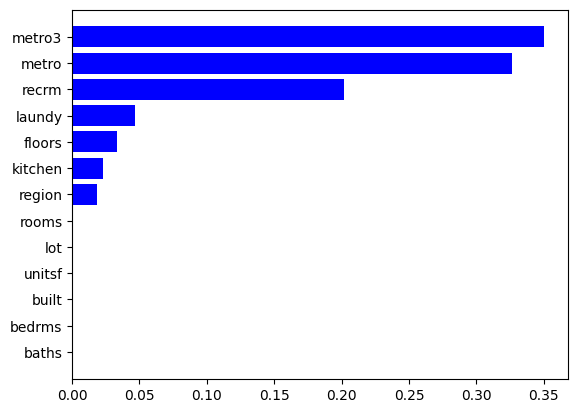

In [47]:
feature_imp = pd.DataFrame( {'importance':best_.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)
print(feature_imp)
plt.barh(feature_names, sorted(feature_imp['importance']), label='Difference', color='blue')
plt.show()

In [48]:
testData = pd.read_csv('./Econ424_F2023_PC2_test_set_without_response_variable_v1.csv')
modelNew = MS(testData.columns, intercept=False) 
DNew = modelNew.fit_transform(testData)
feature_names = list(DNew.columns)
print(DNew)
XNew = np.asarray(DNew)
best_.predict(XNew)



      baths  bedrms  built  unitsf       lot  rooms  region  kitchen  floors  \
0         3       4   1960  3000.0   44000.0     10       3        1       2   
1         1       3   1975  3100.0   44000.0      7       2        1       3   
2         1       2   1940  1480.0    2450.0      4       4        1       2   
3         2       3   2000  1200.0   11000.0      6       3        1       2   
4         4       5   2000  3000.0   11000.0      9       3        1       3   
...     ...     ...    ...     ...       ...    ...     ...      ...     ...   
9995      2       3   1960  1400.0   22000.0      6       3        1       1   
9996      2       4   1985  2000.0  132000.0      8       3        1       1   
9997      2       3   1960  2200.0   44000.0      7       3        1       2   
9998      2       3   2010  2382.0   11000.0      7       3        1       1   
9999      2       3   1995  2090.0   11000.0      8       3        1       1   

      laundy  recrm  metro  metro3  
0 

array([12.74372546, 12.32555749, 12.66302918, ..., 11.97751677,
       11.97751677, 11.97751677])

In [49]:
# Specify the file path where you want to save the CSV
csv_file = "./output.csv"

# Use numpy.savetxt to save the array as a CSV file
np.savetxt(csv_file, best_.predict(XNew), delimiter="\n", fmt="%f")